In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import sys
sys.path.append(r"D:\Miniconda\Lib\site-packages")
import lime
from lime.lime_text import LimeTextExplainer


In [2]:
chat_df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset00.csv")
chat_df_1=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset01.csv")
chat_df_2=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset02.csv")
chat_df_3=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset03.csv")
chat_df_4=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset04.csv")
chat_df_5=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset05.csv")
chat_df_6=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset06.csv")
chat_df_9=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\AI\urlsf_subset09.csv")

In [3]:
chat_df.head()

uid                                               text
0   [urlsf_subset00]-[83]  The National Weather Service's Mike McFarland ...
1   [urlsf_subset00]-[89]  The President of the United States was seen on...
2  [urlsf_subset00]-[390]  Enner Valencia scored two goals in Ecuador's 2...
3  [urlsf_subset00]-[457]  Beginning with the introduction, the author sh...
4  [urlsf_subset00]-[458]  Mexico has implemented its newest data retenti...

In [4]:
ai_generated_df=pd.concat([chat_df,chat_df_1,chat_df_2,chat_df_3,chat_df_4,chat_df_5,chat_df_6,chat_df_9])
ai_generated_df.head()

uid                                               text
0   [urlsf_subset00]-[83]  The National Weather Service's Mike McFarland ...
1   [urlsf_subset00]-[89]  The President of the United States was seen on...
2  [urlsf_subset00]-[390]  Enner Valencia scored two goals in Ecuador's 2...
3  [urlsf_subset00]-[457]  Beginning with the introduction, the author sh...
4  [urlsf_subset00]-[458]  Mexico has implemented its newest data retenti...

In [5]:
ai_generated_df.shape

(29395, 2)

In [6]:
ai_generated_df['label']=1

In [7]:
ai_generated_df.head()

uid                                               text  \
0   [urlsf_subset00]-[83]  The National Weather Service's Mike McFarland ...   
1   [urlsf_subset00]-[89]  The President of the United States was seen on...   
2  [urlsf_subset00]-[390]  Enner Valencia scored two goals in Ecuador's 2...   
3  [urlsf_subset00]-[457]  Beginning with the introduction, the author sh...   
4  [urlsf_subset00]-[458]  Mexico has implemented its newest data retenti...   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [8]:
ai_df = ai_generated_df.drop(columns=['uid'])

# Save the updated DataFrame back to a CSV file
ai_df.to_csv('ai.csv', index=False)

the: 506565
to: 234189
and: 205409
of: 196799
in: 150222
that: 106459
is: 91213
for: 85026
with: 63383
on: 63117
as: 56247
it: 50299
has: 48201
was: 47442
be: 42953
by: 40812
from: 37660
are: 37630
he: 36138
this: 35312
his: 35014
have: 34594
their: 32471
an: 32359
at: 29987
not: 29605
will: 29583
they: 27261
which: 25207
been: 22162
who: 21875
or: 20563
but: 19458
can: 18728
had: 17788
also: 17563
were: 17362
new: 17108
more: 16577
however: 15778
one: 15616
its: 15337
about: 14371
would: 13589
while: 12635
her: 12502
when: 12250
after: 12105
there: 12030
up: 11998


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_10728\1367700320.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


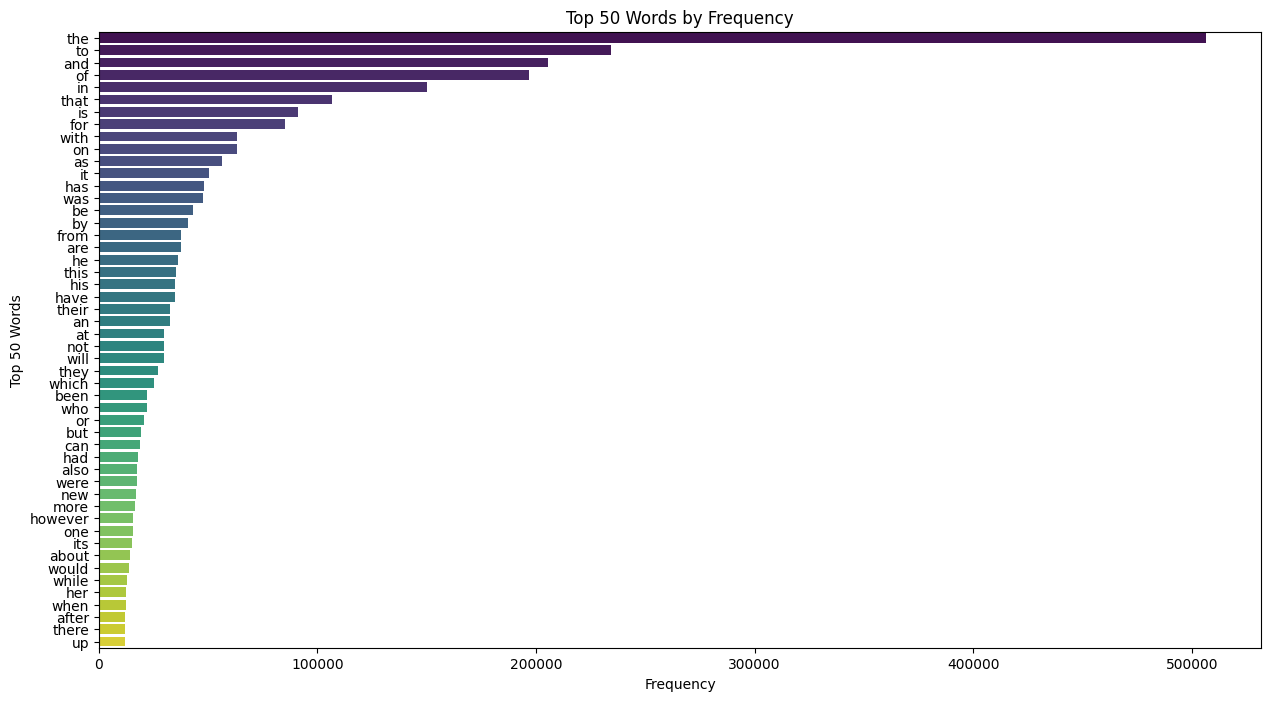

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ai_df['text'])  # X is a sparse matrix

# Step 2: Sum up the word counts without converting to dense array
word_counts = np.array(X.sum(axis=0)).flatten()
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
top_50_words = sorted_word_freq[:50]

# Print the top 50 words with their frequencies
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Step 3: Plot the frequencies
words, freqs = zip(*top_50_words)
plt.figure(figsize=(15, 8))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Top 50 Words')
plt.title('Top 50 Words by Frequency')
plt.show()


In [10]:
open_df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset00 (1).csv")
open_df_1=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset01 (1).csv")
open_df_2=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset02 (1).csv")
open_df_3=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset03 (1).csv")
open_df_4=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset04 (1).csv")
open_df_5=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset05 (1).csv")
open_df_6=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset06 (1).csv")
open_df_9=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Human\urlsf_subset09 (1).csv")

In [11]:
open_df.head()
open_df=pd.concat([open_df,open_df_1,open_df_2,open_df_3,open_df_4,open_df_5,open_df_6,open_df_9])
open_df.head()

uid                                               text
0   [urlsf_subset00]-[83]  Check current weather conditions\r\nIt's going...
1   [urlsf_subset00]-[89]  On Thursday, the president of the United State...
2  [urlsf_subset00]-[390]  Curitiba -\r\nEl delantero Enner Valencia marc...
3  [urlsf_subset00]-[457]  Getting started\r\n(I'm using Windows 10)\r\nA...
4  [urlsf_subset00]-[458]  Today, Mexico's newest data retention law ente...

In [12]:
open_df.shape

(29142, 2)

In [13]:
open_df['label']=0

In [14]:
open_df.drop(columns=['uid'])

text  label
0     Check current weather conditions\r\nIt's going...      0
1     On Thursday, the president of the United State...      0
2     Curitiba -\r\nEl delantero Enner Valencia marc...      0
3     Getting started\r\n(I'm using Windows 10)\r\nA...      0
4     Today, Mexico's newest data retention law ente...      0
...                                                 ...    ...
3648  Academic freedom -- for conservatives -- died ...      0
3649  When Dylan Higgins invited me on to the Field ...      0
3650  John Kasich. AP Photo/John Minchillo\r\nJohn K...      0
3651  A Navy-funded thermal engine bobbing off the c...      0
3652  A U.S. Army Black Hawk helicopter is seen. (Ph...      0

[29142 rows x 2 columns]

In [15]:
open_df.to_csv('human.csv', index=False)

the: 960900
to: 465387
of: 417625
and: 405063
in: 319984
that: 206867
is: 174185
for: 163822
it: 149574
on: 138599
with: 116074
as: 102692
was: 98274
be: 87686
he: 87109
this: 85823
are: 81632
at: 80810
you: 79719
have: 76194
by: 75271
from: 74341
we: 70409
but: 69319
not: 65515
said: 64968
they: 63282
has: 63252
an: 62327
his: 59209
will: 54555
or: 52355
more: 46121
their: 45787
who: 44082
can: 43245
one: 43014
about: 40916
all: 39741
if: 36909
there: 36869
which: 36226
been: 36100
up: 35828
would: 35483
had: 34710
out: 34689
were: 34602
when: 34072
what: 33601


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_10728\1378672217.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


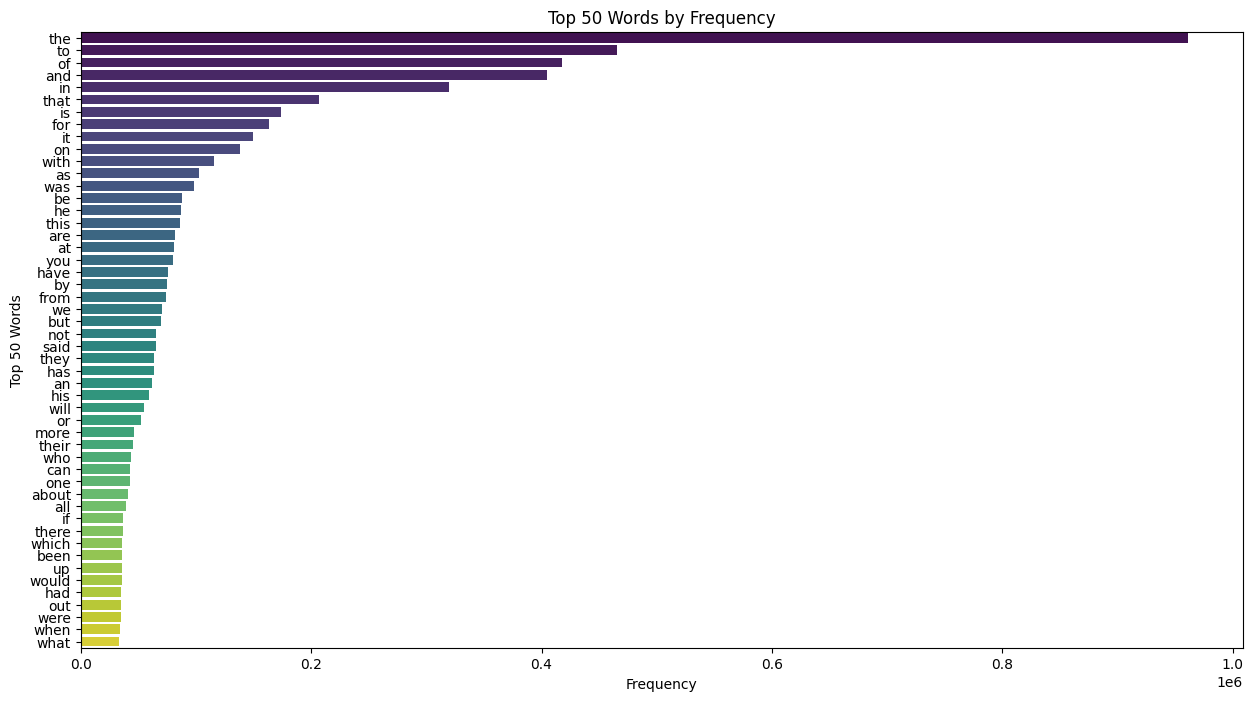

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(open_df['text'])  # X is a sparse matrix

# Step 2: Sum up word counts without converting to dense array
word_counts = np.array(X.sum(axis=0)).flatten()
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
top_50_words = sorted_word_freq[:50]

# Print the top 50 words with their frequencies
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Step 3: Plot the frequencies
words, freqs = zip(*top_50_words)
plt.figure(figsize=(15, 8))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Top 50 Words')
plt.title('Top 50 Words by Frequency')
plt.show()


In [17]:
# Concatenate the datasets
merged_df = pd.concat([open_df, ai_generated_df])

# Shuffle the dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Remove duplicates
shuffled_df = shuffled_df.drop_duplicates(subset=['text'])

# Count the number of rows with label 1 and label 0
count_1 = shuffled_df[shuffled_df['label'] == 1].shape[0]
count_0 = shuffled_df[shuffled_df['label'] == 0].shape[0]

# Shuffle the dataset again after removal
shuffled_df = shuffled_df.sample(frac=1).reset_index(drop=True)

# Get the final size of the dataset
final_size = shuffled_df.shape[0]

In [18]:
print(final_size)

58537


In [19]:
print(shuffled_df.head())
print(shuffled_df.info())
print(shuffled_df.describe())

                         uid  \
0   [urlsf_subset00]-[73084]   
1  [urlsf_subset02]-[257106]   
2  [urlsf_subset06]-[359772]   
3  [urlsf_subset01]-[277496]   
4   [urlsf_subset03]-[83209]   

                                                text  label  
0  UPDATE 11:46 PM EST: NORWEGIAN CRUISE LINES AN...      0  
1  Caught trying to steal third in a first-inning...      0  
2  Donald Trump is now on the record saying he wo...      0  
3  A new report from the Rights and Resources Ini...      1  
4  Now you can get the popular E-Force Supercharg...      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537 entries, 0 to 58536
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     58537 non-null  object
 1   text    58537 non-null  object
 2   label   58537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
              label
count  58537.000000
mean       0.502161
std        0.500000
min        0

In [20]:
shuffled_df.drop(columns=['uid'])
shuffled_df.to_csv('Final_dataset.csv',index=False)
print(shuffled_df.head())

                         uid  \
0   [urlsf_subset00]-[73084]   
1  [urlsf_subset02]-[257106]   
2  [urlsf_subset06]-[359772]   
3  [urlsf_subset01]-[277496]   
4   [urlsf_subset03]-[83209]   

                                                text  label  
0  UPDATE 11:46 PM EST: NORWEGIAN CRUISE LINES AN...      0  
1  Caught trying to steal third in a first-inning...      0  
2  Donald Trump is now on the record saying he wo...      0  
3  A new report from the Rights and Resources Ini...      1  
4  Now you can get the popular E-Force Supercharg...      0  


In [21]:
label_counts = shuffled_df['label'].value_counts()

# Print the counts
print("Count of label 0:", label_counts.get(0, 0))
print("Count of label 1:", label_counts.get(1, 0))


Count of label 0: 29142
Count of label 1: 29395


In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\Final_dataset.csv")

# Replace '\r' and '\n' with an empty string in all columns
df = df.replace({'\r': '', '\n': ''}, regex=True)

# Save the cleaned dataset
df.to_csv('cleaned_Dataset.csv', index=False)


In [23]:
df

uid  \
0       [urlsf_subset00]-[73084]   
1      [urlsf_subset02]-[257106]   
2      [urlsf_subset06]-[359772]   
3      [urlsf_subset01]-[277496]   
4       [urlsf_subset03]-[83209]   
...                          ...   
58532  [urlsf_subset03]-[382263]   
58533  [urlsf_subset02]-[104026]   
58534  [urlsf_subset03]-[237762]   
58535  [urlsf_subset09]-[215431]   
58536  [urlsf_subset06]-[302086]   

                                                    text  label  
0      UPDATE 11:46 PM EST: NORWEGIAN CRUISE LINES AN...      0  
1      Caught trying to steal third in a first-inning...      0  
2      Donald Trump is now on the record saying he wo...      0  
3      A new report from the Rights and Resources Ini...      1  
4      Now you can get the popular E-Force Supercharg...      0  
...                                                  ...    ...  
58532  Region: Central US East US East US 2 North Cen...      0  
58533  There's been a key struggle in each of UTEP's ...      0  
58534  Lockheed Martin, the company behind stealth te...      1  
58535  Despite the countless conspiracy theories surr...      0  
58536  Rebels have grabbed more territory in Mali, in...      0  

[58537 rows x 3 columns]

In [23]:
df.head()

uid  \
0   [urlsf_subset02]-[96410]   
1  [urlsf_subset00]-[178924]   
2   [urlsf_subset06]-[87539]   
3  [urlsf_subset06]-[320238]   
4  [urlsf_subset05]-[240879]   

                                                text  label  
0  Less than 48 hours after the United States ann...      1  
1  Donald Trump, the presumptive Republican nomin...      1  
2  BOCA RATON, Fla. -- The Browns are moving forw...      0  
3  BALTIMORE, Md. (WJLA) -- An investigation into...      0  
4  Cloudflare, a web security vendor, announced o...      1

In [24]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\cleaned_Dataset.csv")

In [25]:
# Assuming df is your DataFrame
df.drop(columns=['uid'], inplace=True)

In [26]:
df

text  label
0      UPDATE 11:46 PM EST: NORWEGIAN CRUISE LINES AN...      0
1      Caught trying to steal third in a first-inning...      0
2      Donald Trump is now on the record saying he wo...      0
3      A new report from the Rights and Resources Ini...      1
4      Now you can get the popular E-Force Supercharg...      0
...                                                  ...    ...
58532  Region: Central US East US East US 2 North Cen...      0
58533  There's been a key struggle in each of UTEP's ...      0
58534  Lockheed Martin, the company behind stealth te...      1
58535  Despite the countless conspiracy theories surr...      0
58536  Rebels have grabbed more territory in Mali, in...      0

[58537 rows x 2 columns]

In [26]:
df.head()

text  label
0  Less than 48 hours after the United States ann...      1
1  Donald Trump, the presumptive Republican nomin...      1
2  BOCA RATON, Fla. -- The Browns are moving forw...      0
3  BALTIMORE, Md. (WJLA) -- An investigation into...      0
4  Cloudflare, a web security vendor, announced o...      1

In [27]:
# Split data into train and test sets
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reset index of validation dataframe

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

 # ADABOOST

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Define pipeline with AdaBoost
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('adaboost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50))
])

In [33]:
# Train the model
model_ada = pipeline.fit(X_train, y_train)

C:\Users\Aryan Kakran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [34]:
# Make predictions
y_pred_ada = pipeline.predict(X_test)
y_pred_proba_ada = pipeline.predict_proba(X_test)

In [35]:
# Calculate the confidence of each prediction
confidences = np.max(y_pred_proba_ada, axis=1)

# Get the indices of the top 10 least confident predictions
least_confident_indices = np.argsort(confidences)[:10]

# Print the top 10 least confident predictions
print("Top 10 Least Confident Predictions:")
for index in least_confident_indices:
    print(f"Index: {index}")
    print(f"Confidence: {confidences[index]}")
    print(f"Prediction Probability: {y_pred_proba_ada[index]}")
    print(f"Text: {X_test.iloc[index]}")
    print(f"Label: {y_test.iloc[index]}\n")

Top 10 Least Confident Predictions:
Index: 6450
Confidence: 0.5000000918929504
Prediction Probability: [0.50000009 0.49999991]
Text: Ramela Carman, reportedly the last Michigan survivor of the Armenian genocide, passed away last Saturday at the age of 102. Carman was a long-time member of St. John Armenian Church, and is remembered as a woman of deep faith in God. She lived through the genocide as a small child, recalling her parents' accounts of what had happened. Carman's memories were recounted in April 2015 at the 100th anniversary of the start of the Armenian genocide, which reached its peak in 1915, and led to the deaths of 1.5m Armenians.
Label: 1

Index: 6878
Confidence: 0.5000031680034075
Prediction Probability: [0.50000317 0.49999683]
Text: Joseph Anthony "Joey" Fatone was born on January 28, 1977 in Brooklyn, New York, to Phyllis and Joseph Anthony Fatone. At age 13, his family moved to Orlando, Florida. After graduating high school, he started to work at Universal Studios. 

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
f1 = f1_score(y_test, y_pred_ada)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("\nAdditional Metrics:")
print(f"F1-score: {f1:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      8730
           1       0.87      0.90      0.88      8832

    accuracy                           0.88     17562
   macro avg       0.88      0.88      0.88     17562
weighted avg       0.88      0.88      0.88     17562


Additional Metrics:
F1-score: 0.88
False Positive Rate (FPR): 0.14
False Negative Rate (FNR): 0.10
True Positive Rate (TPR): 0.90
True Negative Rate (TNR): 0.86


In [40]:
# Create a LIME text explainer
class_names = ["Human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

In [41]:
#Custome Testing!

X_test_new = '''World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific was marked by the
Japanese attack on Pearl Harbor on December 7, 1941, which led to the United States entering
the war. The Pacific theater saw fierce battles across numerous islands, with significant naval
engagements such as the Battle of Midway in 1942, which marked a turning point in favor of the
Allies.
The Holocaust, the systematic genocide of six million Jews and millions of other minorities by
Nazi Germany, remains one of the most horrific aspects of World War II. The war also saw
significant advances in technology and warfare, including the development and use of tanks,
aircraft, and eventually nuclear weapons. The Allied invasion of Normandy on June 6, 1944,
known as D-Day, was a pivotal moment that led to the liberation of Western Europe from Nazi
control. The war in Europe ended on May 8, 1945, with the unconditional surrender of Germany.
In the Pacific, the war continued until August 1945, culminating in the United States dropping
atomic bombs on the Japanese cities of Hiroshima and Nagasaki, leading to Japan's surrender
on September 2, 1945.
World War II resulted in an estimated 70-85 million fatalities, making it the deadliest conflict in
human history. The war caused widespread destruction and significant shifts in political power,
leading to the emergence of the United States and the Soviet Union as superpowers and the
beginning of the Cold War. The United Nations was established in the aftermath to promote
international cooperation and prevent future conflicts. The war's legacy continues to influence
global politics, economics, and society, underscoring the profound impact of this monumental
period in history'''
# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)
# exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)


In [42]:
# Get the prediction probability
prediction_prob = pipeline.predict_proba([X_test_new])
print("Prediction probability:", prediction_prob)

# Print and visualize explanation
print("Text:", X_test_new)
exp.show_in_notebook()

# Print top features contributing to prediction
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Prediction probability: [[0.4910424 0.5089576]]
Text: World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific w

Top 10 features contributing to the prediction:
Feature: significant, Importance: 0.0050800753735928865
Feature: of, Importance: -0.0035586958402054436
Feature: all, Importance: -0.0025806771224837735
Feature: which, Importance: 0.0017658739472064255
Feature: that, Importance: 3.783316087406686e-05
Feature: Germany, Importance: -2.0723553477771906e-05
Feature: the, Importance: -1.7426533573002536e-05
Feature: conflict, Importance: -1.6643714441393378e-05
Feature: war, Importance: -1.6050085573614035e-05
Feature: systematic, Importance: -1.4718915932452124e-05


Total samples: 50
Correctly labeled: 34
Actual AI: 25
Actual Human: 25
Predicted AI: 35
Predicted Human: 15


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_6128\1852985207.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


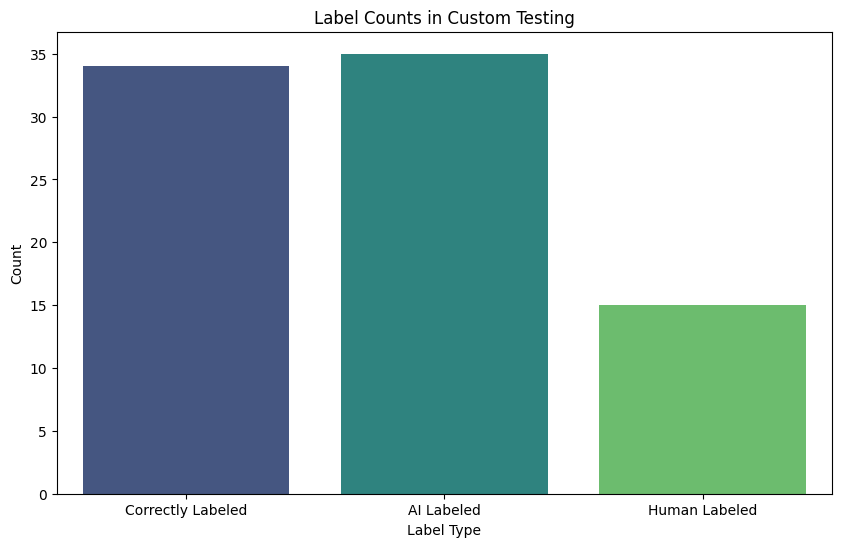

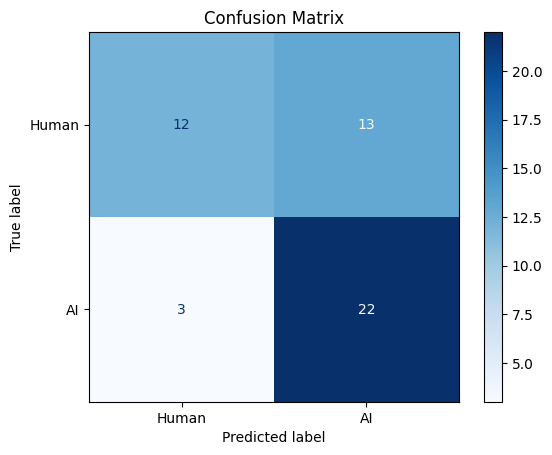

False Positive Rate (FPR): 0.52
False Negative Rate (FNR): 0.12
True Positive Rate (TPR): 0.88
True Negative Rate (TNR): 0.48
F1 Score: 0.73


In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load custom dataset
custom_data = pd.read_csv(r"C:\\Users\\Aryan Kakran\\Desktop\\AI vs Human2\\Custom_Test_Final.csv", encoding='ISO-8859-1')
custom_data = custom_data.sample(frac=1).reset_index(drop=True)
X_custom = custom_data['text']
y_custom = custom_data['label']

# Predict labels for custom dataset
y_custom_pred_ada = pipeline.predict(X_custom)

correctly_labeled = (y_custom == y_custom_pred_ada).sum()
total_samples = len(y_custom)
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()
predicted_ai = (y_custom_pred_ada == 1).sum()
predicted_human = (y_custom_pred_ada == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")

# Plot results
labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_custom, y_custom_pred_ada, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_custom, y_custom_pred_ada, average='binary')

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"F1 Score: {f1:.2f}")

In [46]:
import cloudpickle
with open('adaboost_model.pkl', 'wb') as file:
    cloudpickle.dump(model_ada, file)

# LGBM

In [48]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 320.0 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.5 MB 465.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 535.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 504.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 491.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 425.3 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.5 MB 483.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 503.2 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 519.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 545.8 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 500.5 kB/s eta 0:00:03
   -

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from lightgbm import LGBMClassifier
import cloudpickle

In [50]:
# Load dataset
df = pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\cleaned_Dataset.csv")
df.drop(columns=['uid'], inplace=True)

In [51]:
# Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:

# Reset index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [53]:
# Define pipeline with LightGBM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('lightgbm', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42))
])

In [54]:
# Train the model
model_lgbm = pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 20563, number of negative: 20412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.144960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1391041
[LightGBM] [Info] Number of data points in the train set: 40975, number of used features: 23784
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501843 -> initscore=0.007370
[LightGBM] [Info] Start training from score 0.007370


In [55]:
# Make predictions
y_pred_lgbm = pipeline.predict(X_test)
y_pred_proba_lgbm = pipeline.predict_proba(X_test)

In [56]:
# Calculate the confidence of each prediction
confidences = np.max(y_pred_proba_lgbm, axis=1)

In [57]:
least_confident_indices = np.argsort(confidences)[:10]

In [58]:
# Print the top 10 least confident predictions
print("Top 10 Least Confident Predictions:")
for index in least_confident_indices:
    print(f"Index: {index}")
    print(f"Confidence: {confidences[index]}")
    print(f"Prediction Probability: {y_pred_proba_lgbm[index]}")
    print(f"Text: {X_test.iloc[index]}")
    print(f"Label: {y_test.iloc[index]}\n")

Top 10 Least Confident Predictions:
Index: 9132
Confidence: 0.5001263591471587
Prediction Probability: [0.49987364 0.50012636]
Text: Since 2006, Debian has included a web browser called "Iceweasel" in its software distribution. Iceweasel is basically Mozilla Firefox, but it was renamed due to a licensing disagreement with Mozilla. However, after a decade, Debian and Mozilla have reconciled their differences, and Iceweasel will soon be renamed back to its original name.Mozilla Firefox is open-source software, but the Firefox logo is trademarked. Therefore, if you modify Firefox's source code and create a custom web browser, you cannot call it "Mozilla Firefox" or use the Firefox logo without permission. In 2005, Mozilla gave Debian permission to use the name "Mozilla Firefox" for its browser, but Debian could not use the logo due to its licensing being incompatible with Debian's free software guidelines, the DFSG.In 2006, Mozilla withdrew the permission for Debian to use the Mozilla Fir

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
f1 = f1_score(y_test, y_pred_lgbm)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("\nAdditional Metrics:")
print(f"F1-score: {f1:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      8730
           1       0.91      0.93      0.92      8832

    accuracy                           0.92     17562
   macro avg       0.92      0.91      0.92     17562
weighted avg       0.92      0.92      0.92     17562


Additional Metrics:
F1-score: 0.92
False Positive Rate (FPR): 0.10
False Negative Rate (FNR): 0.07
True Positive Rate (TPR): 0.93
True Negative Rate (TNR): 0.90


In [60]:
# Create a LIME text explainer
class_names = ["Human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

In [61]:
#Custome Testing!

X_test_new = '''World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific was marked by the
Japanese attack on Pearl Harbor on December 7, 1941, which led to the United States entering
the war. The Pacific theater saw fierce battles across numerous islands, with significant naval
engagements such as the Battle of Midway in 1942, which marked a turning point in favor of the
Allies.
The Holocaust, the systematic genocide of six million Jews and millions of other minorities by
Nazi Germany, remains one of the most horrific aspects of World War II. The war also saw
significant advances in technology and warfare, including the development and use of tanks,
aircraft, and eventually nuclear weapons. The Allied invasion of Normandy on June 6, 1944,
known as D-Day, was a pivotal moment that led to the liberation of Western Europe from Nazi
control. The war in Europe ended on May 8, 1945, with the unconditional surrender of Germany.
In the Pacific, the war continued until August 1945, culminating in the United States dropping
atomic bombs on the Japanese cities of Hiroshima and Nagasaki, leading to Japan's surrender
on September 2, 1945.
World War II resulted in an estimated 70-85 million fatalities, making it the deadliest conflict in
human history. The war caused widespread destruction and significant shifts in political power,
leading to the emergence of the United States and the Soviet Union as superpowers and the
beginning of the Cold War. The United Nations was established in the aftermath to promote
international cooperation and prevent future conflicts. The war's legacy continues to influence
global politics, economics, and society, underscoring the profound impact of this monumental
period in history'''
# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)
# exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)


In [63]:
# Get the prediction probability
prediction_prob = pipeline.predict_proba([X_test_new])
print("Prediction probability:", prediction_prob)

# Print and visualize explanation
print("Text:", X_test_new)
exp.show_in_notebook()

# Print top features contributing to prediction
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Prediction probability: [[0.10038738 0.89961262]]
Text: World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific

Top 10 features contributing to the prediction:
Feature: significant, Importance: 0.176686213416682
Feature: to, Importance: 0.10044752082659293
Feature: which, Importance: 0.0745796947011213
Feature: of, Importance: -0.06622908476991701
Feature: the, Importance: 0.06212402318282431
Feature: The, Importance: 0.06084305621419519
Feature: million, Importance: -0.0425852759159388
Feature: making, Importance: 0.0346930211288626
Feature: including, Importance: 0.027317211680915977
Feature: such, Importance: 0.021056769036612744


In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load custom dataset
custom_data = pd.read_csv(r"C:\\Users\\Aryan Kakran\\Desktop\\AI vs Human2\\Custom_Test_Final.csv", encoding='ISO-8859-1')
custom_data = custom_data.sample(frac=1).reset_index(drop=True)
X_custom = custom_data['text']
y_custom = custom_data['label']

# Predict labels for custom dataset
y_custom_pred_lgbm = pipeline.predict(X_custom)

correctly_labeled = (y_custom == y_custom_pred_lgbm).sum()
total_samples = len(y_custom)
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()
predicted_ai = (y_custom_pred_lgbm == 1).sum()
predicted_human = (y_custom_pred_lgbm == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")


Total samples: 50
Correctly labeled: 37
Actual AI: 25
Actual Human: 25
Predicted AI: 28
Predicted Human: 22


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_6128\2410255503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


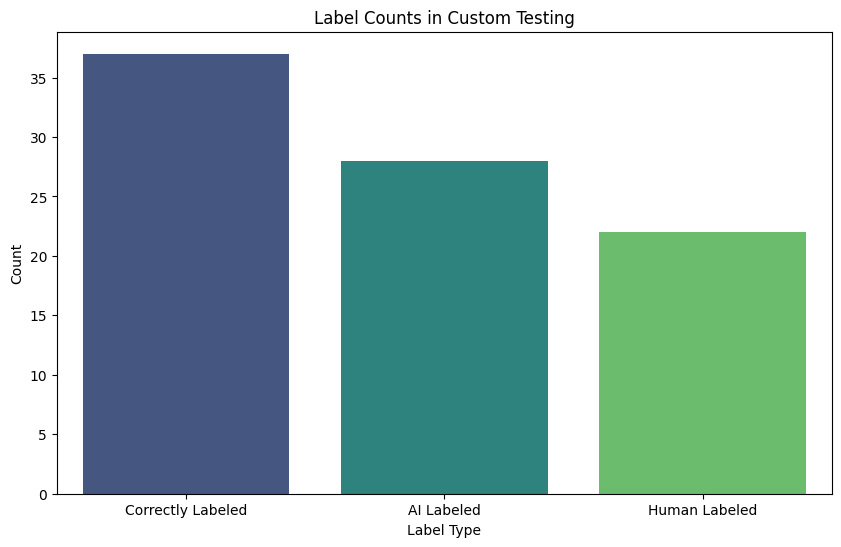

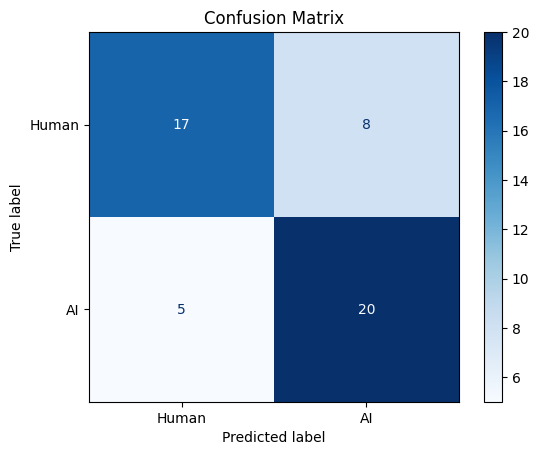

False Positive Rate (FPR): 0.32
False Negative Rate (FNR): 0.20
True Positive Rate (TPR): 0.80
True Negative Rate (TNR): 0.68
F1 Score: 0.60


In [66]:
# Plot results
labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_custom, y_custom_pred_lgbm, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_custom, y_custom_pred_ada, average='binary')

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
with open('lightgbm_model.pkl', 'wb') as file:
    cloudpickle.dump(model_lgbm, file)

# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\cleaned_Dataset.csv")
# Assuming df is your DataFrame
df.drop(columns=['uid'], inplace=True)
df.head()

text  label
0  Less than 48 hours after the United States ann...      1
1  Donald Trump, the presumptive Republican nomin...      1
2  BOCA RATON, Fla. -- The Browns are moving forw...      0
3  BALTIMORE, Md. (WJLA) -- An investigation into...      0
4  Cloudflare, a web security vendor, announced o...      1

In [71]:
# Split data into train and test sets
X = df['text']
y = df['label']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Reset index of validation dataframe

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [74]:
# Define pipeline with Random Forest
pipeline_rf = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [75]:
# Train the model
model_rf = pipeline_rf.fit(X_train, y_train)

In [76]:
# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)

In [77]:
# Calculate the confidence of each prediction
confidences = np.max(y_pred_proba_rf, axis=1)

# Get the indices of the top 10 least confident predictions
least_confident_indices = np.argsort(confidences)[:10]

# Print the top 20 least confident predictions
print("Top 10 Least Confident Predictions:")
for index in least_confident_indices:
    print(f"Index: {index}")
    print(f"Confidence: {confidences[index]}")
    print(f"Prediction Probability: {y_pred_proba_rf[index]}")
    print(f"Text: {X_test.iloc[index]}")
    print(f"Label: {y_test.iloc[index]}\n")

Top 10 Least Confident Predictions:
Index: 11528
Confidence: 0.5
Prediction Probability: [0.5 0.5]
Text: Israel advocates are alarmed by growth in Black-Palestinian solidarity. (Sarah-Ji/Flickr)Palestinians have welcomed the declaration signed by more than 1,000 Black activists, artists and scholars in solidarity with the Palestinian people.This comes as an Israel lobby group is expressing concern at the growing cooperation between Black activists and Palestinians.The statement, whose endorsers include scholar-activists Angela Davis and Cornel West and Black Lives Matter co-founder Patrisse Cullors, urges full support for the Palestinian-led campaign of boycott, divestment and sanctions (BDS) on Israel.First appearing in Ebony earlier this month, the statement emphasizes "return to their homeland in present-day Israel" as "the most important aspect of justice for Palestinians."Mahmoud Nawajaa, general coordinator of the Palestinian BDS National Committee (BNC) said that the Black activ

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Assuming y_test and y_pred are your actual and predicted labels respectively
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Extracting the confusion matrix components
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_rf)

# Calculate the false positive rate and false negative rate
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("\nAdditional Metrics:")
print(f"F1-score: {f1:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

# Extract the number of actual mistakes (false predictions)
actual_mistakes = fp + fn

print("\nTotal number of actual mistakes:", actual_mistakes)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      8730
           1       0.80      0.91      0.85      8832

    accuracy                           0.84     17562
   macro avg       0.85      0.84      0.84     17562
weighted avg       0.85      0.84      0.84     17562


Additional Metrics:
F1-score: 0.85
False Positive Rate (FPR): 0.23
False Negative Rate (FNR): 0.09
True Positive Rate (TPR): 0.91
True Negative Rate (TNR): 0.77

Total number of actual mistakes: 2791


In [79]:
# Create a TF-IDF vectorizer and transform the training and validation data
tfidf_vc = TfidfVectorizer(min_df=10, max_features=100000, analyzer='word', ngram_range=(1, 2), stop_words='english', lowercase=True)
train_vc = tfidf_vc.fit_transform(X_train)
val_vc = tfidf_vc.transform(X_test)

In [80]:
# Create a LIME text explainer
from lime.lime_text import LimeTextExplainer

class_names = ["human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

In [81]:
#Custome Testing!

X_test_new = '''World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific was marked by the
Japanese attack on Pearl Harbor on December 7, 1941, which led to the United States entering
the war. The Pacific theater saw fierce battles across numerous islands, with significant naval
engagements such as the Battle of Midway in 1942, which marked a turning point in favor of the
Allies.
The Holocaust, the systematic genocide of six million Jews and millions of other minorities by
Nazi Germany, remains one of the most horrific aspects of World War II. The war also saw
significant advances in technology and warfare, including the development and use of tanks,
aircraft, and eventually nuclear weapons. The Allied invasion of Normandy on June 6, 1944,
known as D-Day, was a pivotal moment that led to the liberation of Western Europe from Nazi
control. The war in Europe ended on May 8, 1945, with the unconditional surrender of Germany.
In the Pacific, the war continued until August 1945, culminating in the United States dropping
atomic bombs on the Japanese cities of Hiroshima and Nagasaki, leading to Japan's surrender
on September 2, 1945.
World War II resulted in an estimated 70-85 million fatalities, making it the deadliest conflict in
human history. The war caused widespread destruction and significant shifts in political power,
leading to the emergence of the United States and the Soviet Union as superpowers and the
beginning of the Cold War. The United Nations was established in the aftermath to promote
international cooperation and prevent future conflicts. The war's legacy continues to influence
global politics, economics, and society, underscoring the profound impact of this monumental
period in history'''
# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)
# exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)


In [82]:
# Get the prediction probability
prediction_prob = pipeline.predict_proba([X_test_new])

# Print the prediction probability
print("Prediction probability:", prediction_prob)

# Print and visualize the explanation

print("Text:", X_test_new)
exp.show_in_notebook()

# Print the LIME values sorted by importance
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top features contributing to the prediction:")
for feature, importance in sorted_explanation:
    print(f"Feature: {feature}, Importance: {importance}")

# Optional: print top 10 features
print("\nTop 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Prediction probability: [[0.10038738 0.89961262]]
Text: World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific

Top features contributing to the prediction:
Feature: significant, Importance: 0.1770260306233333
Feature: to, Importance: 0.09422941432154626
Feature: which, Importance: 0.08161687418256659
Feature: of, Importance: -0.0631414296993054
Feature: the, Importance: 0.05967751870480215
Feature: The, Importance: 0.05709927124292106
Feature: million, Importance: -0.046193148456545575
Feature: making, Importance: 0.034006434983774605
Feature: including, Importance: 0.027735111854836528
Feature: Meanwhile, Importance: 0.022057993384394323

Top 10 features contributing to the prediction:
Feature: significant, Importance: 0.1770260306233333
Feature: to, Importance: 0.09422941432154626
Feature: which, Importance: 0.08161687418256659
Feature: of, Importance: -0.0631414296993054
Feature: the, Importance: 0.05967751870480215
Feature: The, Importance: 0.05709927124292106
Feature: million, Importance: -0.046193148456545575
Feature: making, Importance: 0.034006434983774605
Feature: including, Importance

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load custom dataset
custom_data = pd.read_csv(r"C:\\Users\\Aryan Kakran\\Desktop\\AI vs Human2\\Custom_Test_Final.csv", encoding='ISO-8859-1')
custom_data = custom_data.sample(frac=1).reset_index(drop=True)
X_custom = custom_data['text']
y_custom = custom_data['label']

# Predict labels for custom dataset
y_custom_pred_rf = pipeline.predict(X_custom)

correctly_labeled = (y_custom == y_custom_pred_rf).sum()
total_samples = len(y_custom)
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()
predicted_ai = (y_custom_pred_rf == 1).sum()
predicted_human = (y_custom_pred_rf == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")


Total samples: 50
Correctly labeled: 37
Actual AI: 25
Actual Human: 25
Predicted AI: 28
Predicted Human: 22


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_6128\3586401264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


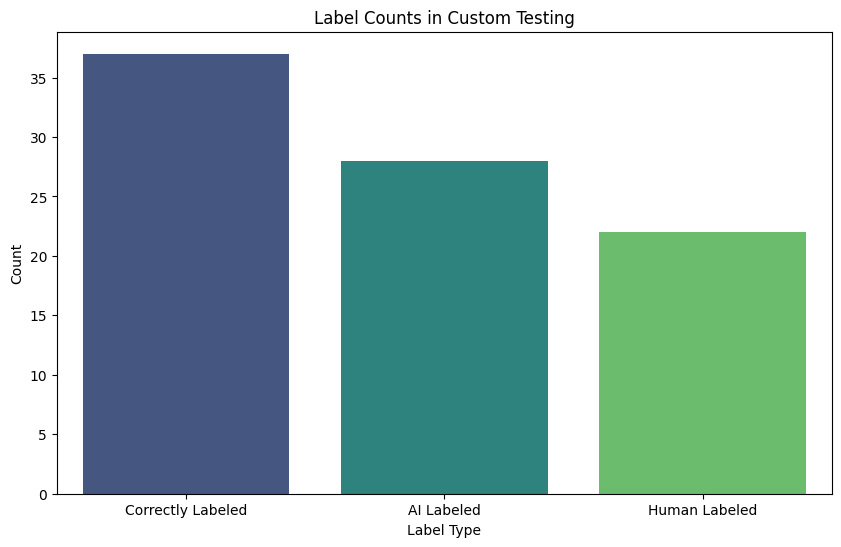

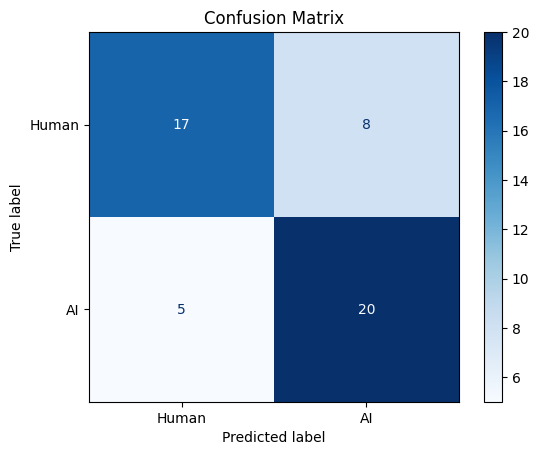

False Positive Rate (FPR): 0.32
False Negative Rate (FNR): 0.20
True Positive Rate (TPR): 0.80
True Negative Rate (TNR): 0.68
F1 Score: 0.75


In [84]:
# Plot results
labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_custom, y_custom_pred_rf, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_custom, y_custom_pred_rf, average='binary')

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"F1 Score: {f1:.2f}")

In [85]:
# Save the Random Forest model
import cloudpickle
with open('random_forest_model.pkl', 'wb') as file:
    cloudpickle.dump(model_rf, file)

# Hard voting classifier (nb+rf+svm)

In [6]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [88]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\cleaned_Dataset.csv")
# Assuming df is your DataFrame
df.drop(columns=['uid'], inplace=True)
df.head()

text  label
0  Less than 48 hours after the United States ann...      1
1  Donald Trump, the presumptive Republican nomin...      1
2  BOCA RATON, Fla. -- The Browns are moving forw...      0
3  BALTIMORE, Md. (WJLA) -- An investigation into...      0
4  Cloudflare, a web security vendor, announced o...      1

In [89]:
# Split data into train and test sets
X = df['text']
y = df['label']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [91]:
# Reset index of validation dataframe

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [92]:
# Define individual models
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)

In [93]:
# Define hard voting classifier (majority voting)
voting_hard = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm)],
    voting='hard'  # Majority voting
)

In [94]:
# Pipeline for Hard Voting Classifier
pipeline_voting_hard = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('voting_classifier', voting_hard)
])

In [95]:
# Train the model
model_voting_hard = pipeline_voting_hard.fit(X_train, y_train)

In [96]:
# Make predictions
y_pred_hard = pipeline_rf.predict(X_test)
y_pred_proba_hard = pipeline_rf.predict_proba(X_test)

In [97]:
# Calculate the confidence of each prediction
confidences = np.max(y_pred_proba_hard, axis=1)

# Get the indices of the top 10 least confident predictions
least_confident_indices = np.argsort(confidences)[:10]

# Print the top 20 least confident predictions
print("Top 10 Least Confident Predictions:")
for index in least_confident_indices:
    print(f"Index: {index}")
    print(f"Confidence: {confidences[index]}")
    print(f"Prediction Probability: {y_pred_proba_hard[index]}")
    print(f"Text: {X_test.iloc[index]}")
    print(f"Label: {y_test.iloc[index]}\n")

Top 10 Least Confident Predictions:
Index: 11528
Confidence: 0.5
Prediction Probability: [0.5 0.5]
Text: Israel advocates are alarmed by growth in Black-Palestinian solidarity. (Sarah-Ji/Flickr)Palestinians have welcomed the declaration signed by more than 1,000 Black activists, artists and scholars in solidarity with the Palestinian people.This comes as an Israel lobby group is expressing concern at the growing cooperation between Black activists and Palestinians.The statement, whose endorsers include scholar-activists Angela Davis and Cornel West and Black Lives Matter co-founder Patrisse Cullors, urges full support for the Palestinian-led campaign of boycott, divestment and sanctions (BDS) on Israel.First appearing in Ebony earlier this month, the statement emphasizes "return to their homeland in present-day Israel" as "the most important aspect of justice for Palestinians."Mahmoud Nawajaa, general coordinator of the Palestinian BDS National Committee (BNC) said that the Black activ

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Assuming y_test and y_pred are your actual and predicted labels respectively
print("Classification Report:\n", classification_report(y_test, y_pred_hard))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hard)

# Extracting the confusion matrix components
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_hard)

# Calculate the false positive rate and false negative rate
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("\nAdditional Metrics:")
print(f"F1-score: {f1:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

# Extract the number of actual mistakes (false predictions)
actual_mistakes = fp + fn

print("\nTotal number of actual mistakes:", actual_mistakes)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      8730
           1       0.80      0.91      0.85      8832

    accuracy                           0.84     17562
   macro avg       0.85      0.84      0.84     17562
weighted avg       0.85      0.84      0.84     17562


Additional Metrics:
F1-score: 0.85
False Positive Rate (FPR): 0.23
False Negative Rate (FNR): 0.09
True Positive Rate (TPR): 0.91
True Negative Rate (TNR): 0.77

Total number of actual mistakes: 2791


In [99]:
# Create a TF-IDF vectorizer and transform the training and validation data
tfidf_vc = TfidfVectorizer(min_df=10, max_features=100000, analyzer='word', ngram_range=(1, 2), stop_words='english', lowercase=True)
train_vc = tfidf_vc.fit_transform(X_train)
val_vc = tfidf_vc.transform(X_test)

In [100]:
# Create a LIME text explainer
from lime.lime_text import LimeTextExplainer

class_names = ["human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

In [101]:
#Custome Testing!

X_test_new = '''World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific was marked by the
Japanese attack on Pearl Harbor on December 7, 1941, which led to the United States entering
the war. The Pacific theater saw fierce battles across numerous islands, with significant naval
engagements such as the Battle of Midway in 1942, which marked a turning point in favor of the
Allies.
The Holocaust, the systematic genocide of six million Jews and millions of other minorities by
Nazi Germany, remains one of the most horrific aspects of World War II. The war also saw
significant advances in technology and warfare, including the development and use of tanks,
aircraft, and eventually nuclear weapons. The Allied invasion of Normandy on June 6, 1944,
known as D-Day, was a pivotal moment that led to the liberation of Western Europe from Nazi
control. The war in Europe ended on May 8, 1945, with the unconditional surrender of Germany.
In the Pacific, the war continued until August 1945, culminating in the United States dropping
atomic bombs on the Japanese cities of Hiroshima and Nagasaki, leading to Japan's surrender
on September 2, 1945.
World War II resulted in an estimated 70-85 million fatalities, making it the deadliest conflict in
human history. The war caused widespread destruction and significant shifts in political power,
leading to the emergence of the United States and the Soviet Union as superpowers and the
beginning of the Cold War. The United Nations was established in the aftermath to promote
international cooperation and prevent future conflicts. The war's legacy continues to influence
global politics, economics, and society, underscoring the profound impact of this monumental
period in history'''
# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)
# exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)


In [102]:
# Get the prediction probability
prediction_prob = pipeline.predict_proba([X_test_new])

# Print the prediction probability
print("Prediction probability:", prediction_prob)

# Print and visualize the explanation

print("Text:", X_test_new)
exp.show_in_notebook()

# Print the LIME values sorted by importance
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top features contributing to the prediction:")
for feature, importance in sorted_explanation:
    print(f"Feature: {feature}, Importance: {importance}")

# Optional: print top 10 features
print("\nTop 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Prediction probability: [[0.10038738 0.89961262]]
Text: World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific

Top features contributing to the prediction:
Feature: significant, Importance: 0.17976030915889477
Feature: to, Importance: 0.09795847836341794
Feature: of, Importance: -0.07318655889894796
Feature: which, Importance: 0.07252407654738574
Feature: The, Importance: 0.06268309762657198
Feature: the, Importance: 0.05928759596627279
Feature: million, Importance: -0.0421172748590777
Feature: making, Importance: 0.03317064370927846
Feature: including, Importance: 0.028624389790925485
Feature: such, Importance: 0.022116626532011997

Top 10 features contributing to the prediction:
Feature: significant, Importance: 0.17976030915889477
Feature: to, Importance: 0.09795847836341794
Feature: of, Importance: -0.07318655889894796
Feature: which, Importance: 0.07252407654738574
Feature: The, Importance: 0.06268309762657198
Feature: the, Importance: 0.05928759596627279
Feature: million, Importance: -0.0421172748590777
Feature: making, Importance: 0.03317064370927846
Feature: including, Importance: 0.028

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load custom dataset
custom_data = pd.read_csv(r"C:\\Users\\Aryan Kakran\\Desktop\\AI vs Human2\\Custom_Test_Final.csv", encoding='ISO-8859-1')
custom_data = custom_data.sample(frac=1).reset_index(drop=True)
X_custom = custom_data['text']
y_custom = custom_data['label']

# Predict labels for custom dataset
y_custom_pred_hard = pipeline.predict(X_custom)

correctly_labeled = (y_custom == y_custom_pred_hard).sum()
total_samples = len(y_custom)
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()
predicted_ai = (y_custom_pred_hard == 1).sum()
predicted_human = (y_custom_pred_hard == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")


Total samples: 50
Correctly labeled: 37
Actual AI: 25
Actual Human: 25
Predicted AI: 28
Predicted Human: 22


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_6128\4240418240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


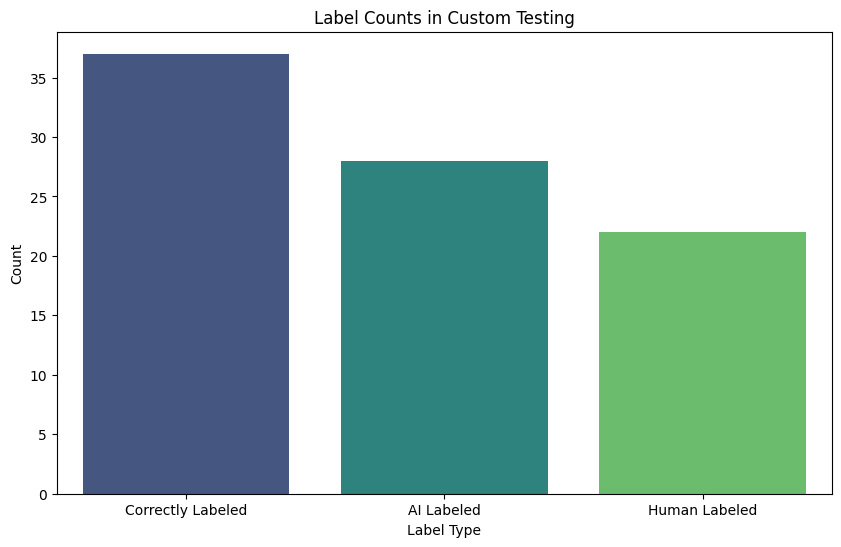

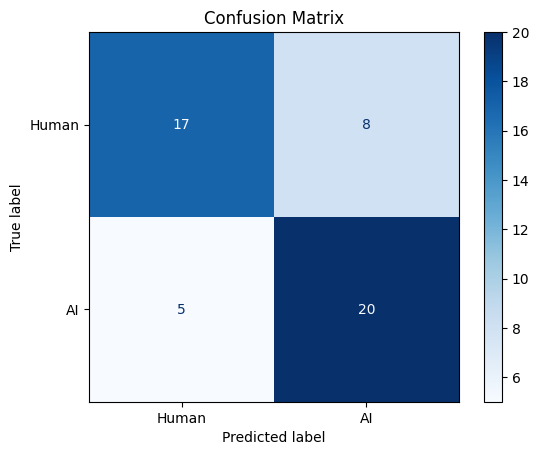

False Positive Rate (FPR): 0.32
False Negative Rate (FNR): 0.20
True Positive Rate (TPR): 0.80
True Negative Rate (TNR): 0.68
F1 Score: 0.60


In [104]:
# Plot results
labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_custom, y_custom_pred_hard, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_custom, y_custom_pred_hard, average='binary')

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"F1 Score: {f1:.2f}")

In [105]:
# Save the Random Forest model
import cloudpickle
with open('voting_classifier_hard.pkl', 'wb') as file:
    cloudpickle.dump(model_voting_hard, file)

# Soft voting classifier

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Aryan Kakran\Desktop\AI vs Human2\cleaned_Dataset.csv")
# Assuming df is your DataFrame
df.drop(columns=['uid'], inplace=True)
df.head()

text  label
0  Less than 48 hours after the United States ann...      1
1  Donald Trump, the presumptive Republican nomin...      1
2  BOCA RATON, Fla. -- The Browns are moving forw...      0
3  BALTIMORE, Md. (WJLA) -- An investigation into...      0
4  Cloudflare, a web security vendor, announced o...      1

In [3]:
# Split data into train and test sets
X = df['text']
y = df['label']

In [4]:
# Reset index of validation dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
# Define individual models
from sklearn.ensemble import RandomForestClassifier
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True,kernel='linear', random_state=42)

In [9]:
# Define soft voting classifier (majority voting)
voting_soft = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm)],
    voting='soft'  # Majority voting
)

In [10]:
# Pipeline for Soft Voting Classifier
pipeline_voting_soft = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('voting_classifier', voting_soft)
])

In [ ]:
# Train the model
model_voting_soft = pipeline_voting_soft.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_soft = pipeline_rf.predict(X_test)
y_pred_proba_soft = pipeline_rf.predict_proba(X_test)

In [ ]:
# Calculate the confidence of each prediction
confidences = np.max(y_pred_proba_soft, axis=1)

# Get the indices of the top 10 least confident predictions
least_confident_indices = np.argsort(confidences)[:10]

# Print the top 20 least confident predictions
print("Top 10 Least Confident Predictions:")
for index in least_confident_indices:
    print(f"Index: {index}")
    print(f"Confidence: {confidences[index]}")
    print(f"Prediction Probability: {y_pred_proba_soft[index]}")
    print(f"Text: {X_test.iloc[index]}")
    print(f"Label: {y_test.iloc[index]}\n")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Assuming y_test and y_pred are your actual and predicted labels respectively
print("Classification Report:\n", classification_report(y_test, y_pred_soft))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_soft)

# Extracting the confusion matrix components
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_soft)

# Calculate the false positive rate and false negative rate
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("\nAdditional Metrics:")
print(f"F1-score: {f1:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

# Extract the number of actual mistakes (false predictions)
actual_mistakes = fp + fn

print("\nTotal number of actual mistakes:", actual_mistakes)


In [ ]:
# Create a TF-IDF vectorizer and transform the training and validation data
tfidf_vc = TfidfVectorizer(min_df=10, max_features=100000, analyzer='word', ngram_range=(1, 2), stop_words='english', lowercase=True)
train_vc = tfidf_vc.fit_transform(X_train)
val_vc = tfidf_vc.transform(X_test)

In [ ]:
# Create a LIME text explainer
from lime.lime_text import LimeTextExplainer

class_names = ["human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
#Custome Testing!

X_test_new = '''World War II, which lasted from 1939 to 1945, was one of the most significant and devastating
conflicts in human history, involving the vast majority of the world's nations, including all of the
great powers, eventually forming two opposing military alliances: the Allies and the Axis. The
war began on September 1, 1939, when Germany, under the leadership of Adolf Hitler, invaded
Poland. This act prompted Britain and France to declare war on Germany. The conflict soon
expanded as Germany, Italy, and Japan sought territorial expansion, leading to widespread
global conflict.
In Europe, Germany's blitzkrieg tactics led to the rapid conquest of several countries. France fell
in 1940, and Britain endured the prolonged Battle of Britain, successfully resisting German air
assaults. Meanwhile, in Eastern Europe, Germany invaded the Soviet Union in 1941, initiating a
brutal and prolonged conflict on the Eastern Front. The war in the Pacific was marked by the
Japanese attack on Pearl Harbor on December 7, 1941, which led to the United States entering
the war. The Pacific theater saw fierce battles across numerous islands, with significant naval
engagements such as the Battle of Midway in 1942, which marked a turning point in favor of the
Allies.
The Holocaust, the systematic genocide of six million Jews and millions of other minorities by
Nazi Germany, remains one of the most horrific aspects of World War II. The war also saw
significant advances in technology and warfare, including the development and use of tanks,
aircraft, and eventually nuclear weapons. The Allied invasion of Normandy on June 6, 1944,
known as D-Day, was a pivotal moment that led to the liberation of Western Europe from Nazi
control. The war in Europe ended on May 8, 1945, with the unconditional surrender of Germany.
In the Pacific, the war continued until August 1945, culminating in the United States dropping
atomic bombs on the Japanese cities of Hiroshima and Nagasaki, leading to Japan's surrender
on September 2, 1945.
World War II resulted in an estimated 70-85 million fatalities, making it the deadliest conflict in
human history. The war caused widespread destruction and significant shifts in political power,
leading to the emergence of the United States and the Soviet Union as superpowers and the
beginning of the Cold War. The United Nations was established in the aftermath to promote
international cooperation and prevent future conflicts. The war's legacy continues to influence
global politics, economics, and society, underscoring the profound impact of this monumental
period in history'''
# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)
# exp = explainer.explain_instance(X_test_new, pipeline.predict_proba, num_features=10)


In [ ]:
# Get the prediction probability
prediction_prob = pipeline.predict_proba([X_test_new])

# Print the prediction probability
print("Prediction probability:", prediction_prob)

# Print and visualize the explanation

print("Text:", X_test_new)
exp.show_in_notebook()

# Print the LIME values sorted by importance
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top features contributing to the prediction:")
for feature, importance in sorted_explanation:
    print(f"Feature: {feature}, Importance: {importance}")

# Optional: print top 10 features
print("\nTop 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load custom dataset
custom_data = pd.read_csv(r"C:\\Users\\Aryan Kakran\\Desktop\\AI vs Human2\\Custom_Test_Final.csv", encoding='ISO-8859-1')
custom_data = custom_data.sample(frac=1).reset_index(drop=True)
X_custom = custom_data['text']
y_custom = custom_data['label']

# Predict labels for custom dataset
y_custom_pred_soft = pipeline.predict(X_custom)

correctly_labeled = (y_custom == y_custom_pred_soft).sum()
total_samples = len(y_custom)
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()
predicted_ai = (y_custom_pred_soft == 1).sum()
predicted_human = (y_custom_pred_soft == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")


In [ ]:
# Plot results
labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_custom, y_custom_pred_soft, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_custom, y_custom_pred_soft, average='binary')

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
# Save the Random Forest model
import cloudpickle
with open('voting_classifier_hard.pkl', 'wb') as file:
    cloudpickle.dump(model_voting_hard, file)